### Description:

In this notebook, we will compute the IOU for the Yolo nas default and predicted.......

In [ ]:
### run only once a
#pip install -q super-gradients==3.1.1
# pip install torchinfo
####

In [1]:
from ultralytics import NAS
from iou_utils_NAS import *
import warnings
warnings.filterwarnings("ignore")


The console stream is logged into /Users/mautushid/sg_logs/console.log


[2023-08-02 20:20:19] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-08-02 20:20:20] WARNING - redirects.py - NOTE: Redirects are currently not supported in Windows or MacOs.
[2023-08-02 20:20:25] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-08-02 20:20:25] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-08-02 20:20:25] WARNING - export.py - Failed to import pytorch_quantization
[2023-08-02 20:20:25] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-08-02 20:20:25] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.


In [2]:
### Dataset Directory
data_directory = '/Users/mautushid/github/Yolo_Nas/cow_test-1'
dataset_params['data_dir'] = data_directory

In [6]:
''' 
from torchinfo import summary

summary(model=yolo_nas_l,
        input_size=(16, 3, 640, 640),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
        )
'''

' \nfrom torchinfo import summary\n\nsummary(model=yolo_nas_l,\n        input_size=(16, 3, 640, 640),\n        col_names=["input_size", "output_size", "num_params", "trainable"],\n        col_width=20,\n        row_settings=["var_names"]\n        )\n'

In [28]:

### Loading ground truth data (bounding box information)
test_images = "/Users/mautushid/github/Yolo_Nas/cow_test-1/test/images"
test_labels = "/Users/mautushid/github/Yolo_Nas/cow_test-1/test/labels"

### defining prediction output directory 
#output_dir_default = "/Users/mautushid/github/Yolo_Nas/predicted_test/predicted_test_default"
#output_dir_fintuned = "/Users/mautushid/github/Yolo_Nas/predicted_test/predicted_test_finetuned"

### Load the model (default Yolo_Nas_L)
yolo_nas_l = models.get("yolo_nas_l", pretrained_weights="coco")

### Loading model (after fine-tuning)
model_path = "/Users/mautushid/github/Yolo_Nas/n200_yolo_na_i1_trial100/ckpt_best.pth"
#best_model = models.get('yolo_nas_l',num_classes=len(dataset_params['classes']),checkpoint_path=model_path)
best_model = models.get('yolo_nas_l', num_classes=80, checkpoint_path=model_path)
#best_model = NAS(model_path)




[2023-08-02 20:51:56] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-08-02 20:51:57] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Yolo_Nas/n200_yolo_na_i1_trial100/ckpt_best.pth EMA checkpoint.


In [ ]:
### making predictions for default model
#predicted_image_list_default = show_predicted_images_from_dir(yolo_nas_l, test_images, conf = 0.6)

In [ ]:
### making predictions for finetuned model
#predicted_image_list_finetuned = show_predicted_images_from_dir(best_model, test_images, conf = 0.60)

### Get bounding boxes of the predicted images

img_1


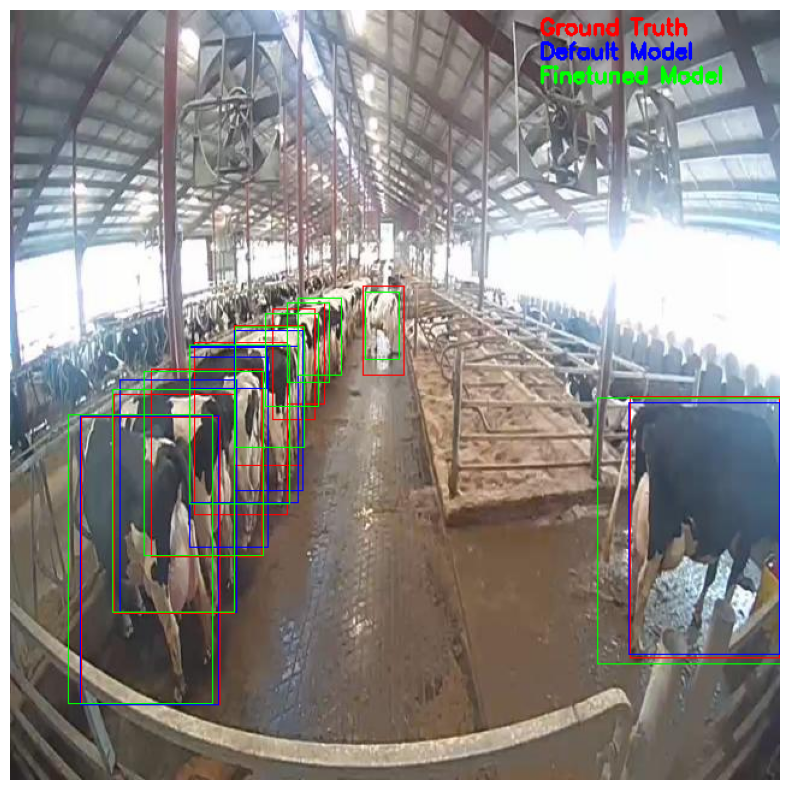

img_27


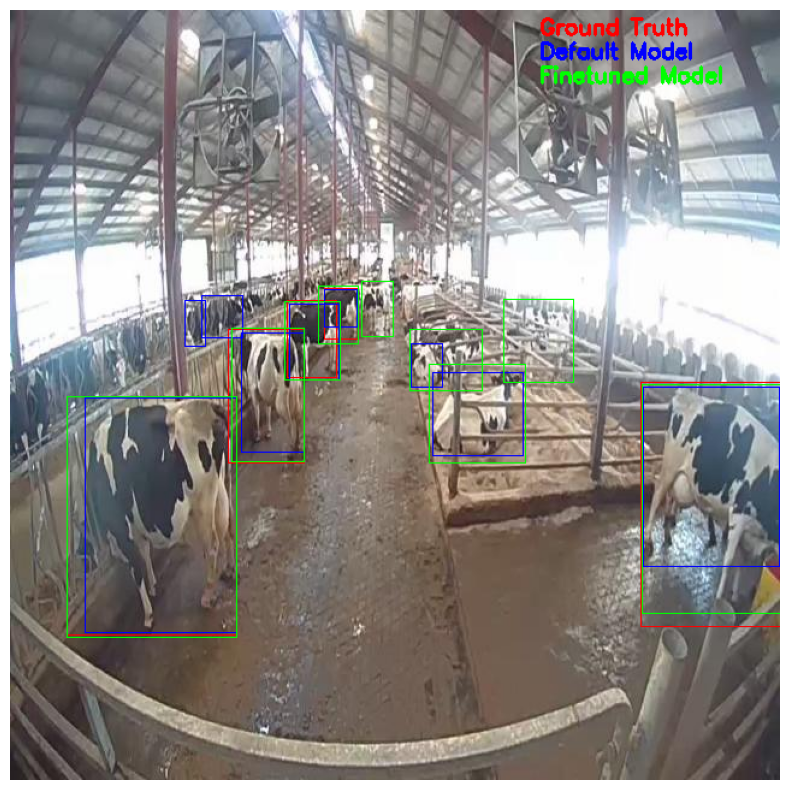

img_29


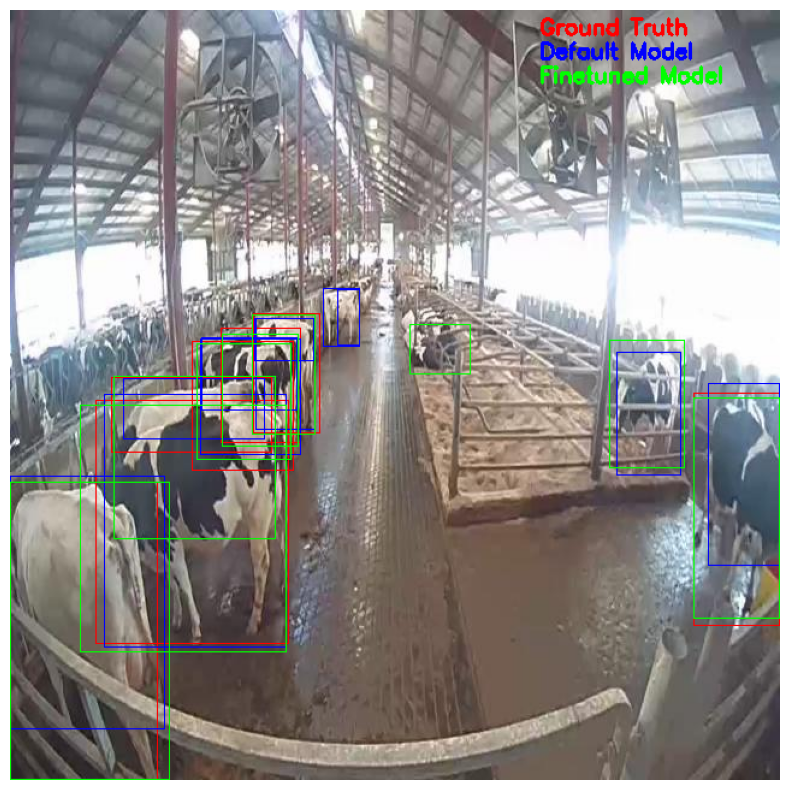

img_33


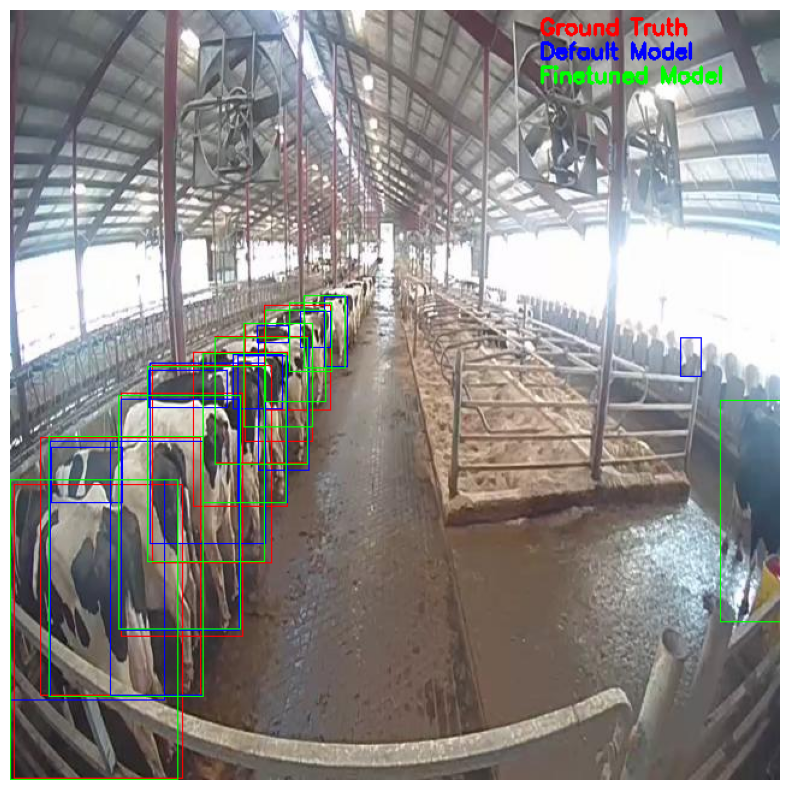

img_46


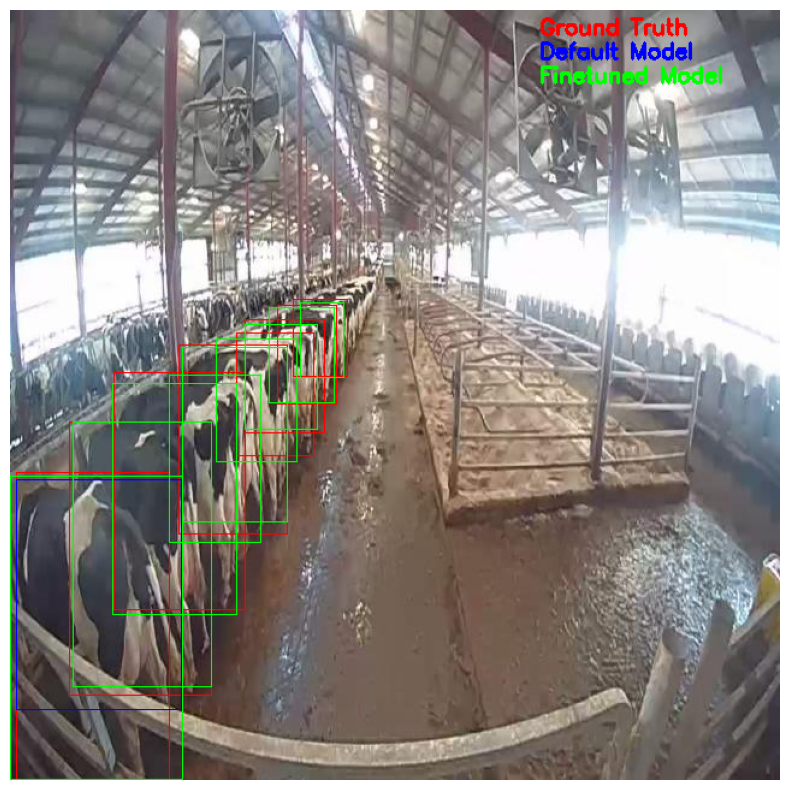

img_5


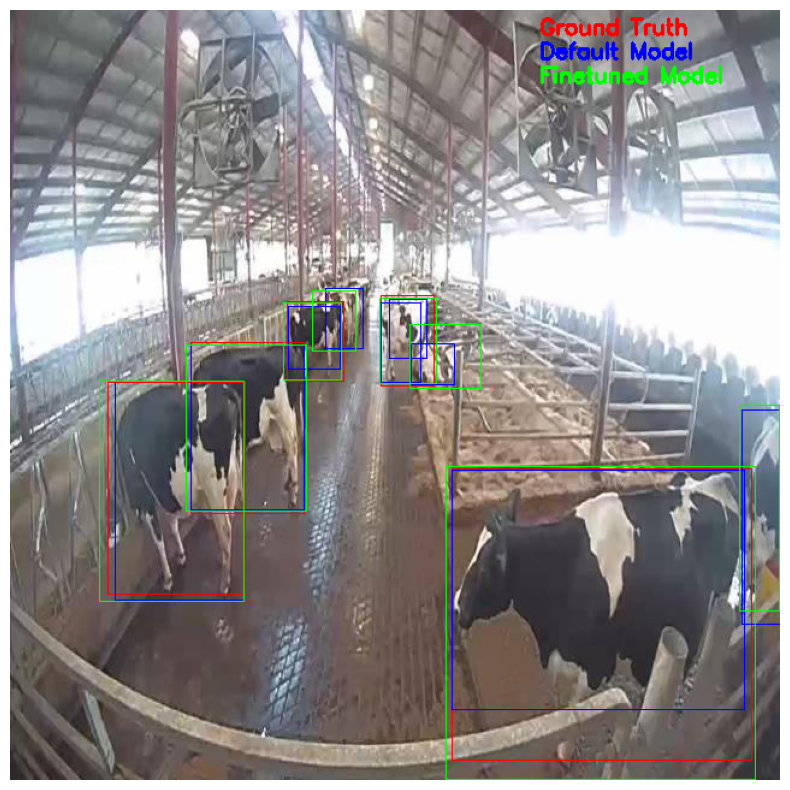

In [24]:
image_files = sorted(list(Path(test_images).rglob("*.jpg")))
label_files = sorted(list(Path(test_labels).rglob("*.txt")))
default_model = yolo_nas_l
finetuned_model = best_model 
iou_dicts = []
for i in range (len(image_files)):
    test_image_path = str(image_files[i])
    test_image_label = str(label_files[i])
    prediction_dict = get_boxex_for_all_models(test_image_path,test_image_label,default_model,finetuned_model, conf = 0.6)
    print(prediction_dict['image'])
    iou_dicts.append(compute_iou_for_all_models(prediction_dict))
    draw_boxes_all_models(test_image_path, prediction_dict)
    

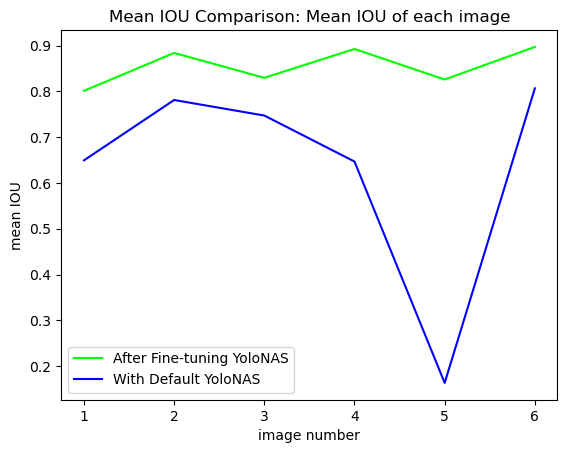

In [25]:
### Compute mean_IoU for both models for all images

x = list(range(1, len(iou_dicts)+1))
y1 = [np.mean(iou_dicts[i]['IOU_with_finetuned_YoloNAS'])for i in range(len(iou_dicts))]
y2 = [np.mean(iou_dicts[i]['IOU_with_default_YoloNAS']) for i in range(len(iou_dicts))]

# Plot the first dictionary in blue and the second in red
plt.plot(x, y1, color='lime', label='After Fine-tuning YoloNAS')
plt.plot(x, y2, color='blue', label='With Default YoloNAS')

# Add labels and title to the plot
plt.legend()

plt.xlabel('image number')
plt.ylabel('mean IOU')
plt.title('Mean IOU Comparison: Mean IOU of each image')
plt.xticks(range(1, len(iou_dicts) + 1))
# Show the plot
plt.show()


In [ ]:
################### map@50 #####################
import os

In [29]:
with open('/Users/mautushid/github/Yolo_Nas/n200_yolo_na_i1_trial100/experiment_logs_Aug02_13_49_27.txt', 'r') as file:
    log_data = file.read()


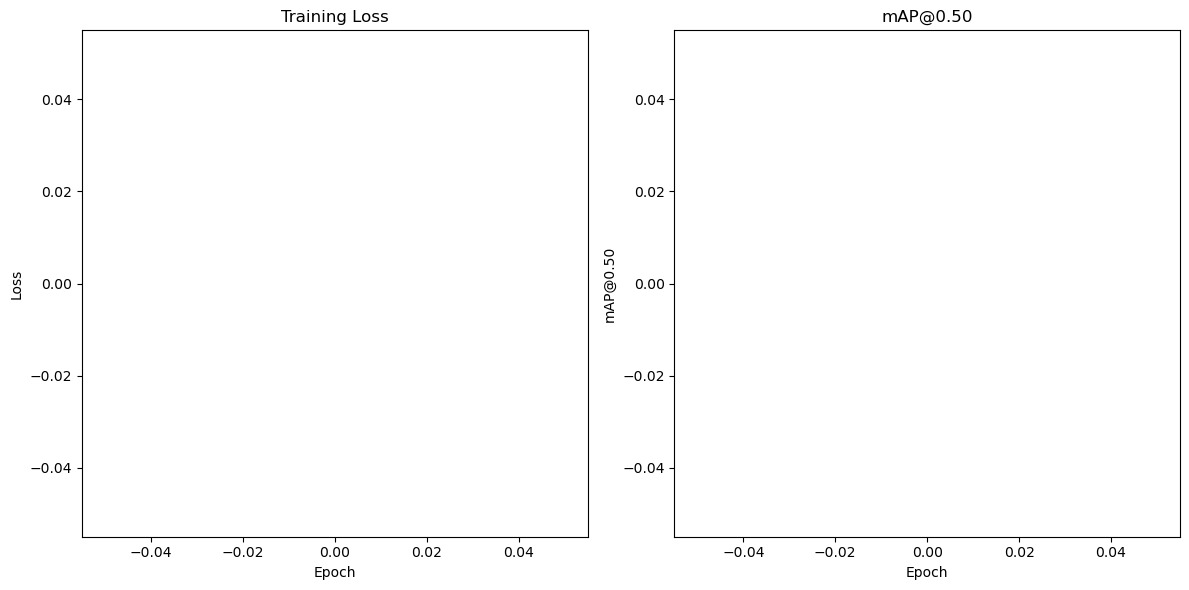

In [30]:
import re
import matplotlib.pyplot as plt

# Read the log file
with open('/Users/mautushid/github/Yolo_Nas/n200_yolo_na_i1_trial100/experiment_logs_Aug02_13_49_27.txt', 'r') as file:
    log_data = file.read()
# Extract mAP@0.50 values from the logs
map_values = re.findall("validation mAP@0.50: (\d+\.\d+)", log_data)
map_values = [float(value) for value in map_values]

# Extract loss values from the logs (you need to adjust the regex pattern according to your logs)
loss_values = re.findall("your_loss_pattern_here", log_data)
loss_values = [float(value) for value in loss_values]

# Assume 1 epoch for each mAP value
epochs = list(range(1, len(map_values) + 1))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(epochs, map_values)
plt.title("mAP@0.50")
plt.xlabel("Epoch")
plt.ylabel("mAP@0.50")

plt.tight_layout()
plt.show()


In [31]:
import re


def extract_metrics(log_line):
    regex_pattern = r"Epoch (\d+) \(\d+\/\d+\)\s+-.*Valid_PPYoloELoss/loss: (.*?)\s+Valid_Precision@0.50: (.*?)\s+Valid_Recall@0.50: (.*?)\s+Valid_mAP@0.50: (.*?)\s+Valid_F1@0.50: (.*?)\s+"

    match = re.search(regex_pattern, log_line)
    if match:
        epoch = int(match.group(1))
        loss = float(match.group(2))
        precision = float(match.group(3))
        recall = float(match.group(4))
        mAP = float(match.group(5))
        F1 = float(match.group(6))
        return {"epoch": epoch, "loss": loss, "precision": precision, "recall": recall, "mAP": mAP, "F1": F1}


with open("/Users/mautushid/github/Yolo_Nas/n200_yolo_na_i1_trial100/experiment_logs_Aug02_13_49_27.txt", "r") as log_file:
    lines = log_file.readlines()

metrics = [extract_metrics(line)
           for line in lines if extract_metrics(line) is not None]

# print metrics to check
for metric in metrics:
    print(metric)


{'epoch': 0, 'loss': 3.186041831970215, 'precision': 0.14116176962852478, 'recall': 0.24053333699703217, 'mAP': 0.10829205811023712, 'F1': 0.17791222035884857}
{'epoch': 1, 'loss': 5.621962070465088, 'precision': 0.026638343930244446, 'recall': 0.4949333369731903, 'mAP': 0.1486297845840454, 'F1': 0.050555676221847534}
{'epoch': 2, 'loss': 5.6374897956848145, 'precision': 0.03822827711701393, 'recall': 0.7093333601951599, 'mAP': 0.28462329506874084, 'F1': 0.07254677265882492}
{'epoch': 3, 'loss': 3.2631163597106934, 'precision': 0.04083612561225891, 'recall': 0.9429333209991455, 'mAP': 0.44066646695137024, 'F1': 0.07828205078840256}
{'epoch': 4, 'loss': 2.89646315574646, 'precision': 0.03994632884860039, 'recall': 0.9685333371162415, 'mAP': 0.5608341097831726, 'F1': 0.07672807574272156}
{'epoch': 5, 'loss': 2.6436896324157715, 'precision': 0.038840726017951965, 'recall': 0.9749333262443542, 'mAP': 0.6635748744010925, 'F1': 0.07470524311065674}
{'epoch': 6, 'loss': 2.2281992435455322, 'p

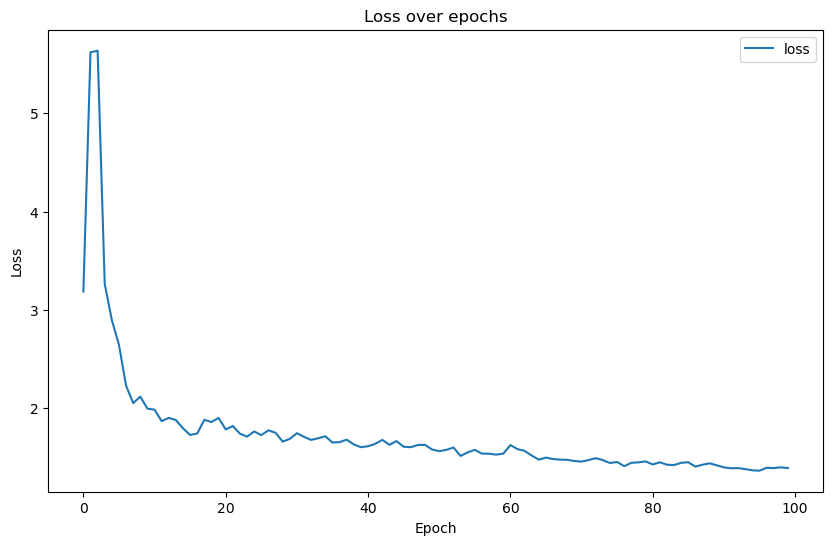

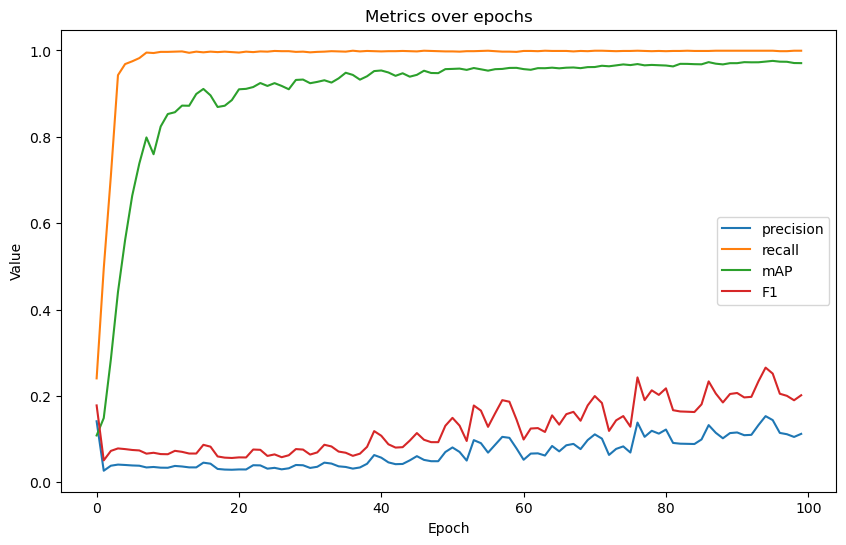

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# replace data with your actual metrics
df = pd.DataFrame(metrics)

# plot loss
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['loss'], label='loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot precision, recall, mAP, F1
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['precision'], label='precision')
plt.plot(df['epoch'], df['recall'], label='recall')
plt.plot(df['epoch'], df['mAP'], label='mAP')
plt.plot(df['epoch'], df['F1'], label='F1')
plt.title('Metrics over epochs')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
def plot_metrics(metrics):
    for key, values in metrics.items():
        epochs, vals = zip(*values)
        plt.plot(epochs, vals, label=key)

    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


# replace with your file path

plot_metrics(metrics)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# replace this with your actual data
data = [
    {'epoch': 0, 'loss': 3.1864261627197266, 'precision': 0.1415681391954422,
        'recall': 0.24213333427906036, 'mAP': 0.10841891169548035, 'F1': 0.17867206037044525},
    {'epoch': 1, 'loss': 6.577571868896484, 'precision': 0.020746460184454918,
        'recall': 0.4298666715621948, 'mAP': 0.10820219665765762, 'F1': 0.03958256542682648},
    # ...
    # add all your data here
]

# create a DataFrame
df = pd.DataFrame(data)

# plot loss
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['loss'], label='loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot precision, recall, mAP, F1
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['precision'], label='precision')
plt.plot(df['epoch'], df['recall'], label='recall')
plt.plot(df['epoch'], df['mAP'], label='mAP')
plt.plot(df['epoch'], df['F1'], label='F1')
plt.title('Metrics over epochs')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()
